# The Etymological Machine Usage

All files were written and tested with python 3.5


## Pattern-Match Categorizer


`regex_categorizer.py` is a script that takes the contents of `etymonline.tsv`, which should contain the data scraped from the website and cleaned of HTML and prints their categories to `categorized.tsv`



## Statistical Categorizer


`statistical_categorizer.py` contains several functions that are best called from a Jupyter notebook or iPython session. 

`run_cv_test` takes a percentage of the dataset (between 0 and 1), a filename prefix that feature vectors will be written to or read from, and several boolean values corresponding to the features to be used, and whether to write to or read from the named file.    

Function definition

```
def run_CV_test(test_percent, iofilename, bow=True, 
                letters=False,
                year=False, syllables=False,
                verbose=True, new_design_matrix=False):
```

It prints the accuracy, precision, recall, and f-score of a 5-fold Cross Validation test using a linear kernel classifier. 

`makelinearmodels` takes a filename, a holdout percentage to test the accuracy of the trained model, and the same boolean keyword arguments as `run_cv_test`. 

```
def makelinearmodels(filename, holdout_percent, 
                     normalize_X=False,
                     test_percent=1, bow=True, letters=False, 
                     year=False, syllables=False,
                     new_design_matrix=False):
```

This funcption returns the model it makes, and it prepares a confusion matrix that can be displayed with `pl.show()`

Initializing wordlist
Initializing letter list
Initializing syllable list
Reading in design and target matrices
training linearSVC
done
metrics.f1score: 
0.587027177347


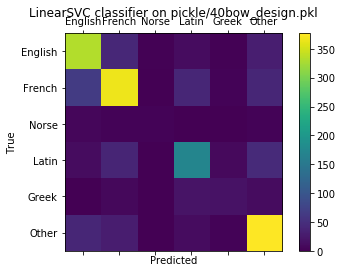

In [1]:
from statistical_categorizer import *

clf = makelinearmodels("pickle/40bow_", .1)

pl.show()


In [23]:
# clf = makelinearmodels("pickle/12_bow_letters_year_", .1)


# if you want to redo the vectors, set new_design_matrix to true

# default values
# def makelinearmodels(filename, holdout_percent, normalize_X=False,
#                      test_percent=1, bow=True, letters=False, year=False, 
#                      syllables=False):

# filename must match the testpercent/letters/year arguments. 

# pl.show()


# classify everything, including the data that didn't have a classification yet
# new_category_dict = {}
# transformer = {
#     0: "English",
#     1: "French",
#     2: "Norse",
#     3: "Latin",
#     4: "Greek",
#     5: "Other",
# }



for word in etymdict.keys():
    vector = featurizer(word, etymdict[word], bow=True, letters=False, year=False, syllables=False)
    break
#     prediction = clf.predict(vector)
#     prediction = prediction[0]
#     new_category_dict[word] = transformer[prediction]

# if the result is satisfactory,
# write new_category_dict out to a file using tsvopener.writeitout

print(vector)
print(vector.shape)

  (0, 685)	1
  (0, 2833)	1
  (0, 3707)	1
  (0, 30211)	1
  (0, 42487)	1
  (0, 43329)	1
  (0, 46978)	1
  (0, 66213)	1
  (0, 76049)	1
  (0, 78414)	1
  (0, 78890)	1
  (0, 106606)	4
  (0, 111300)	1
  (0, 117587)	1
  (0, 132646)	1
  (0, 136452)	2
  (0, 152685)	1
  (0, 152964)	2
(1, 159644)


In [25]:
print(word)
print(etymdict[word])
print(allsyllables[1763])
print(allsyllables[166])
print(allsyllables[275])
print(allsyllables[4489])
print(15)
print(allletters[1], allletters[17], allletters[19], allletters[45], allletters[143])
print(allletters[6])

print()

print(allwords[685], 1)
print(allwords[7], 0)
print(allwords[2833], 1)
print(allwords[106606], 4)
print(allwords[136452], 2)

conscript (adj.)
1530s, from Latin conscriptus, past participle of conscribere "to draw up, list," literally "to write together" (see conscription).
script
ress
thaw
con
15
i 1 . a h
—

participle 1
genea 0
literally 1
, 4
'' 2


## Etymachine

`etymachine.py` contains visualization tools for the analysis of real texts. 

`make_lexicon_pie` takes an input dictionary (should be `new_category_dict`) and makes a pie chart of the full lexicon. This should be approximately the same as the "bad chart from the internet"

`make_analysis_pie` takes a a list of sentences, in nltk.corpus format (lists of `(word, tag)` tuples), a title, and several boolean arguments: whether to separate them into types, whether to show the chart on completion, whether to include unknown words in the total. 

`plot_clustered_stacked` creates a stacked-bar-chart from a set of pandas dataframes. This code was mostly borrowed from this Stack Overflow answer. 
http://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas

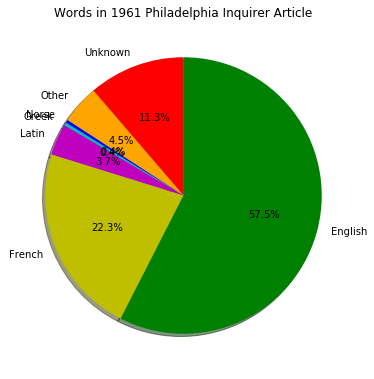

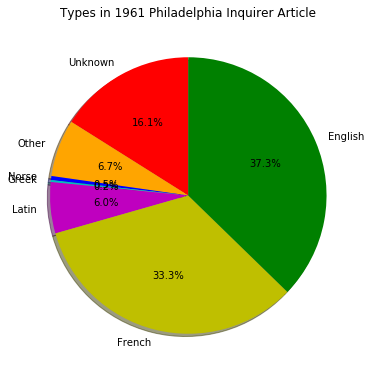

In [5]:
from Etymachine import *

sentences = brown.tagged_sents("ca09")
title = "Words in 1961 Philadelphia Inquirer Article"
make_analysis_pie(sentences, title, show=False)
title = "Types in 1961 Philadelphia Inquirer Article"
make_analysis_pie(sentences, title, show=False, token=True)
pl.show()